Using TensorFlow backend.


['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg', 'person1003_virus_1685.jpeg', 'person1004_bacteria_2935.jpeg', 'person1004_virus_1686.jpeg', 'person1005_bacteria_2936.jpeg', 'person1005_virus_1688.jpeg']
['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0128-0001.jpeg', 'IM-0129-0001.jpeg', 'IM-0131-0001.jpeg', 'IM-0133-0001.jpeg']
total training PNEUMONIA images: 3883
total training NORMAL images: 1349


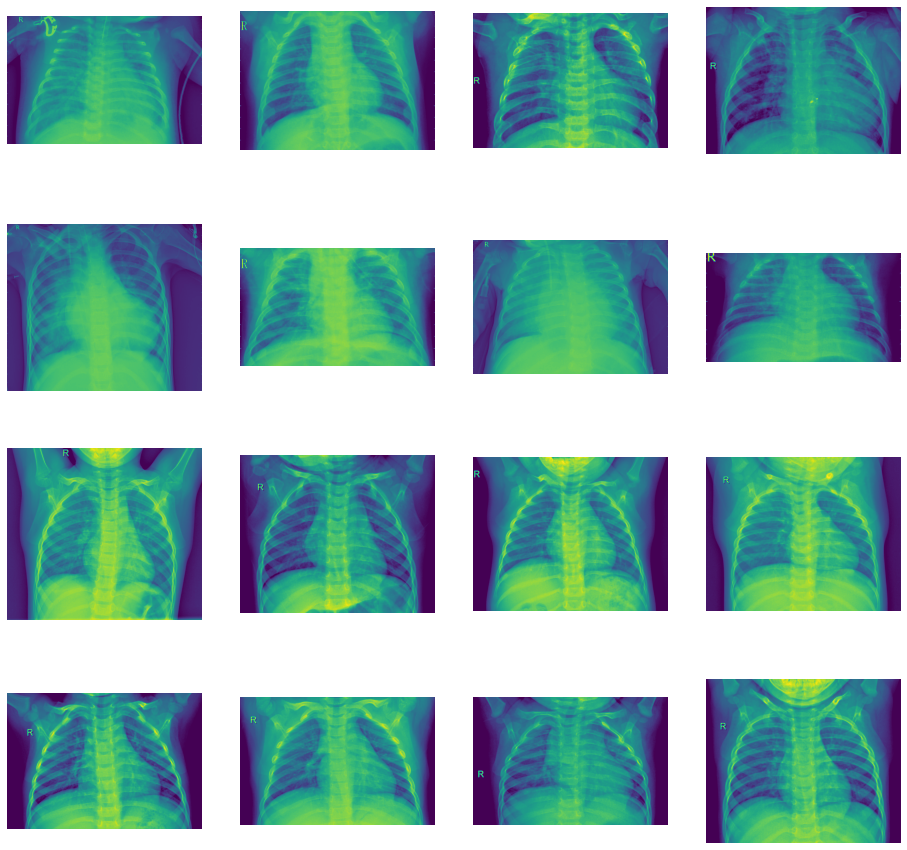

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       1

10/10 [==============================] - 18s 2s/step - loss: 0.2262 - accuracy: 0.9146 - val_loss: 0.2405 - val_accuracy: 0.9102
Epoch 42/100
10/10 [==============================] - 18s 2s/step - loss: 0.2297 - accuracy: 0.9073 - val_loss: 0.2425 - val_accuracy: 0.9141
Epoch 43/100
10/10 [==============================] - 19s 2s/step - loss: 0.2058 - accuracy: 0.9281 - val_loss: 0.2371 - val_accuracy: 0.9180
Epoch 44/100
10/10 [==============================] - 18s 2s/step - loss: 0.2274 - accuracy: 0.9021 - val_loss: 0.2360 - val_accuracy: 0.8984
Epoch 45/100
10/10 [==============================] - 18s 2s/step - loss: 0.2048 - accuracy: 0.9219 - val_loss: 0.2324 - val_accuracy: 0.9023
Epoch 46/100
10/10 [==============================] - 19s 2s/step - loss: 0.2448 - accuracy: 0.8958 - val_loss: 0.2325 - val_accuracy: 0.9023
Epoch 47/100
10/10 [==============================] - 20s 2s/step - loss: 0.2356 - accuracy: 0.9073 - val_loss: 0.2342 - val_accuracy: 0.9062
Epoch 48/100
10/10 

Epoch 99/100
10/10 [==============================] - 21s 2s/step - loss: 0.2380 - accuracy: 0.9021 - val_loss: 0.2320 - val_accuracy: 0.8984
Epoch 100/100
10/10 [==============================] - 23s 2s/step - loss: 0.2317 - accuracy: 0.8990 - val_loss: 0.2320 - val_accuracy: 0.8984
Saved model to disk


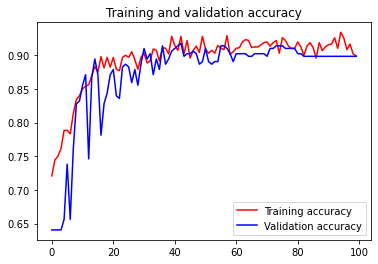

<Figure size 432x288 with 0 Axes>

In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import tensorboard as tb

train_dir = r'E:\Tensorflow\decision_tree\ChestXRay2017\chest_xray\train'
validation_dir = r'E:\Tensorflow\decision_tree\ChestXRay2017\chest_xray\test'
# Directory with our training horse pictures
train_PNEUMONIA_dir = os.path.join(r'E:\Tensorflow\decision_tree\ChestXRay2017\chest_xray\train\PNEUMONIA')

# Directory with our training human pictures
train_NORMAL_dir = os.path.join(r'E:\Tensorflow\decision_tree\ChestXRay2017\chest_xray\train\NORMAL')

train_PNEUMONIA_names = os.listdir(train_PNEUMONIA_dir)
print(train_PNEUMONIA_names[:10])

train_NORMAL_names = os.listdir(train_NORMAL_dir)
print(train_NORMAL_names[:10])

print('total training PNEUMONIA images:', len(os.listdir(train_PNEUMONIA_dir)))
print('total training NORMAL images:', len(os.listdir(train_NORMAL_dir)))

%matplotlib inline

def scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))
        

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_PNEUMONIA_pix = [os.path.join(train_PNEUMONIA_dir, fname) 
                for fname in train_PNEUMONIA_names[pic_index-8:pic_index]]
next_NORMAL_pix = [os.path.join(train_NORMAL_dir, fname) 
                for fname in train_NORMAL_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_PNEUMONIA_pix+next_NORMAL_pix):

  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

logdir = "E:\Tensorflow\decision_tree\ChestXRay2017\log\scalar" + "DLV4dot1"
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range=40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=96,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size  = 32,
                                                         class_mode  = 'binary', 
                                                         target_size = (200, 200))

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = model.fit(train_generator,
                    steps_per_epoch=10,  
                    epochs=100,
                    validation_data = validation_generator,
                    validation_steps = 8,
                    verbose=1,callbacks=[tensorboard_callback, lr_callback])

model.save("DLV4dot1.h5")
print("Saved model to disk")

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [15]:
import numpy as np
import sys
import os
from os import read
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


def DeepModel():
    
    model = tf.keras.models.load_model('DLV4dot1.h5')
    path= r"E:\Tensorflow\decision_tree\ChestXRay2017\chest_xray\train\PNEUMONIA\person3_bacteria_12.jpeg"
    img=image.load_img(path, target_size=(200, 200))
    x=image.img_to_array(img)
    x=x/255
    y=np.expand_dims(x, axis=0)
    images = np.vstack([y])
    classes=(model.predict(images, batch_size=16))
    print(classes)
    if classes<0.5:
        print("input image is normal")    
    else:
        print("input image is infected")



age = int(input("age?"))
sex = int(input("gender?"))
fever = int(input("Do you have fever?"))
cough= int(input("Do you cough?"))
soreness= int(input("Do you have muscle sourness?"))
fatigue= int(input("Do you have fatigue?"))
headache= int(input("Do you have headache?"))
respiratory = int(input("Do you have any respiratory symptoms?"))
nasal= int(input("Do you have any nasal congestion?"))
dataset = pd.read_csv("dataset_ml.csv",encoding= 'unicode_escape')


#decisiontree
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,9]

regressor = DecisionTreeClassifier()
regressor.fit(x.iloc[:,0:9], y)

x_in = np.array([age,sex,fever,cough,soreness,fatigue,headache,respiratory,nasal])
y_pred = regressor.predict([x_in])
print(y_pred)

if y_pred == 0:
    print("Low chances of covid-19,might be purely based on age demographic,please check with doctor if symptoms get worse")
    if respiratory == 0:
        print("No respiratory issues")
    else:
        print("Respiratory issues,wait...")
        DeepModel()
else:
    print("High chances of covid-19,might be purely based on age demographic,please check with doctor if symptoms get worse,wait...")
    DeepModel()

age?55
gender?1
Do you have fever?1
Do you cough?1
Do you have muscle sourness?1
Do you have fatigue?1
Do you have headache?1
Do you have any respiratory symptoms?0
Do you have any nasal congestion?1
[0]
Low chances of covid-19,might be purely based on age demographic,please check with doctor
No respiratory issues
